In [1]:
%%html

<script src="https://cdn.geogebra.org.apps/deployggb.js"></script>

In [2]:
from geogebra.ggb import *

ggb = GGB()

from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

<IPython.core.display.Javascript object>

# Let's look at limits!

## Math 1560 Calculus I

### Sean Fitzpatrick
### University of Lethbridge, Fall 2022

## The concept of a limit

The **limit** concept is a difficult one, but it's essential to understanding calculus.
When we write 
$$\lim_{x\to c}f(x) = L,$$
we are saying that the values of $f(x)$ can be made as close to $L$ as we want,
as long as we use an $x$ value that's close enough to $c$.

Crucially, we do not allow $x$ to equal $c$ in the definition. It can get close, but never equal.

Here's the graph of a function. Notice how the $y$ values change as we drag $x$. At what points does it appear as though our function does not have a limit?

In [3]:
ggb.material('pahq4ff7').draw()

<IPython.core.display.Javascript object>

## An algebraic limit


Consider the following example:

$$\lim_{x\to 2}\frac{x^2-5x+6}{x^2-4} = -\frac14$$

Why is this true?

First, look at the graph:

In [4]:
ggb.material('rnajzfgq').draw()

<IPython.core.display.Javascript object>

We can also program this function into the computer, and analyze it.

Below, we're using the *Sympy* library of the Python programming language.

It lets us have nicer looking output than pure Python.

In [5]:
def f(x):
    return (x**2-5*x+6)/(x**2-4)

Let's make sure the computer understood us correctly.

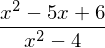

In [6]:
f(x)

Fortunately for us, Sympy knows how to compute limits of functions. The syntax is `limit(function, variable, value)`.

Let's give it a try.

In [7]:
limit(f(x),x,2)

All signs seem to point to a limit of $-\frac14$. How do we see this for ourselves?

Note that a limit is necessary here: $f(2)$ is undefined.

If we try to put $x=2$, we get the nonsensical result of $\frac00$.

But this is a *rational function*: the top and bottom are both *polynomials*.

For any polynomial $p(x)$, if $p(a)=0$, then $(x-a)$ is a factor!

So we should be able to factor out $(x-2)$ from both top and bottom:

$$f(x) = \frac{x^2-5x+6}{x^2-4} = \frac{(x-2)(x-3)}{(x-2)(x+2)}$$

Next, you want to cancel the $x-2$ factors and proceed.

But it would be **false** to write $f(x)=\dfrac{x-3}{x+2}$, because we lose the exception $x\neq 2$.

Here's where limits come to the rescue!

Remember: in $\lim\limits_{x\to 2}f(x)$, we consider values of $x$ close to 2, *but not equal to 2*. 

Since we don't let $x=2$, we're allowed to cancel, and after that, the properties of limits take over:

$$\begin{aligned}\lim_{x\to 2}f(x) &= \lim_{x\to 2}\frac{x^2-5x+6}{x^2-4}\\
&= \lim_{x\to 2}\frac{x-3}{x+2}\\
&= \frac{\lim_{x\to 2}(x-3)}{\lim_{x\to 2}(x+2)}\\
&= \frac{2-3}{2+2} = -\frac14,\end{aligned}$$

just as we expected.

## A trigonometric limit

Next, we're going to explore the limit

$$\lim_{x\to 0}\dfrac{\sin(x)}{x}.$$

Like the last example, trying to evaluate directly results in $\frac00$.

Unlike the last example, we cannot simply factor an $x$ out from the top to cancel it.

To get an idea of what we're dealing with, we'll first explore numerically and graphically.

Let's start by defining our function.

In [8]:
def g(x):
    return sin(x)/x

Let's confirm that this is what we want by asking Jupyter to display the function.

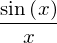

In [9]:
g(x)

Next, let's enter some test values for our function near $x=0$, and add some code to produce the corresponding $y$ values.

In [10]:
Xvalues = [0.5,-0.5,0.1,-0.1,0.01,-0.01,0.001,-0.001]
resultArray = []

for values in Xvalues:
    resultArray.append([str(values), g(values)])
    
print("x", " "*6, "| f(x)")
print("-"*28)
for result in resultArray:
    print (result[0], " "*(7 - len(result[0])), "|", result[1])

x        | f(x)
----------------------------
0.5      | 0.958851077208406
-0.5     | 0.958851077208406
0.1      | 0.998334166468282
-0.1     | 0.998334166468282
0.01     | 0.999983333416666
-0.01    | 0.999983333416666
0.001    | 0.999999833333342
-0.001   | 0.999999833333342


Next, let's look at the graph.

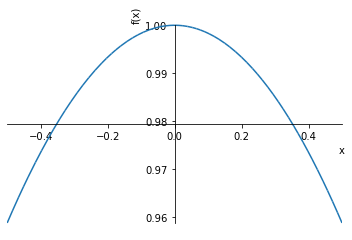

In [11]:
graph = plot(g(x), (x, -0.5, 0.5))

Finally, we can use Python to simply compute the limit:

In [12]:
limit(g(x),x,0)

So, how do we see this is true? Consider the following diagram. The length of the first vertical line (in blue), is $\sin(x)$. The length of the circular arc (in red), is $x$, and the length of the second vertical line (in green) is $\tan(x)$.

In [13]:
ggb.material('vrfvagcx').draw()

<IPython.core.display.Javascript object>

We see that for all values of $x> 0$, we have

$$\sin(x)\leq x\leq \tan(x).$$

This can be rearranged to give

$$\cos(x) \leq \frac{\sin(x)}{x}\leq 1,$$

and this is true for any $x>0$. (With a bit more work, the same inequality holds for $x<0$.)

Now we can ask: what happens when we let $x\to 0$?

In [14]:
ggb.material('cucrrvqg').draw()

<IPython.core.display.Javascript object>